In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load, dump
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../data/final_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/final_df.csv'

In [ ]:
df.columns

Index(['Unnamed: 0', 'Year', 'Annual_Cyclones', 'Sahel_Annual', 'AMO_Annual',
       'ENSO_Annual', 'TEMP_Annual', 'precip', 'Conus_temp', 'NE_temp',
       'nao_sst', 'nta_index', 'TNA_sst', 'AMM_sst', 'Nina_index', 'TSA_index',
       'NAO_Jones', 'rh_value', 'NJ_precip_x', 'NJ_precip_y', 'Hurricanes',
       'height_x', 'trop_pressure', 'precip_water', 'Off_Coast_Pressure',
       'height_y', 'geo_height_offcoast', 'wind_value', 'Cyclones_Binary'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'height_x', 'NJ_precip_x'])

In [ ]:
meridia = load('../joblib_files/meridia.joblib')
meridia.rename(columns={"Annual":"Meridia_slp"}, inplace=True)
meridia.tail(1)

,Year,Meridia_slp
155,2004,0.134194


In [ ]:
nassau = load('joblib_files/nassau.joblib')
nassau.rename(columns={"Annual":"Nassau_slp"}, inplace=True)
nassau.tail(10)

,Year,Nassau_slp
146,1995,-0.497419
147,1996,0.302581
148,1997,0.469247
149,1998,0.702581
150,1999,-1.464086
151,2000,0.135914
152,2001,1.269247
153,2002,0.102581
154,2003,0.369247
155,2004,0.102581


In [ ]:
charleston = load('joblib_files/charleston.joblib')
charleston.rename(columns={"Annual":"Charleston_slp"}, inplace=True)
charleston.head(1)

,Year,Charleston_slp
1,1850,0.612473


In [ ]:
bermuda = load('joblib_files/bermuda.joblib')
bermuda.rename(columns={"Annual":"Bermuda_slp"}, inplace=True)
bermuda.tail(1)

,Year,Bermuda_slp
155,2004,1.812688


In [ ]:
df = df.merge(meridia, on='Year', how='left')

In [ ]:
df = df.merge(bermuda, on='Year', how='left')

In [ ]:
df = df.merge(charleston, on='Year', how='left')

In [ ]:
df = df.merge(nassau, on='Year', how='left')

In [ ]:
hadcrut = load('joblib_files/hadcrut.joblib')
hadcrut.rename(columns={"Time": "Year", "Anomaly (deg C)":"HADCRUT_Anomaly"}, inplace=True)
hadcrut = hadcrut[['Year', 'HADCRUT_Anomaly']]
hadcrut.tail(10)

,Year,HADCRUT_Anomaly
165,2015,1.130841
166,2016,1.255193
167,2017,1.115397
168,2018,0.959662
169,2019,1.143743
170,2020,1.275910
171,2021,1.078193
172,2022,1.099802
173,2023,1.413866
174,2024,1.558519


In [ ]:
df = df.merge(hadcrut, on='Year', how='left')

In [ ]:
#dump(df, 'joblib_files/updated_final_df.joblib')

In [ ]:
df.set_index('Year', inplace=True)

In [ ]:
df['Hurricanes_Binary'] = df['Hurricanes'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
hurricane_binary = df.copy()

In [ ]:
hurricane_binary = hurricane_binary[['AMO_Annual', 'ENSO_Annual', 'Hurricanes_Binary']]

In [ ]:
#dump(hurricane_binary, 'joblib_files/hurricanes_binary.joblib')

['joblib_files/hurricanes_binary.joblib']

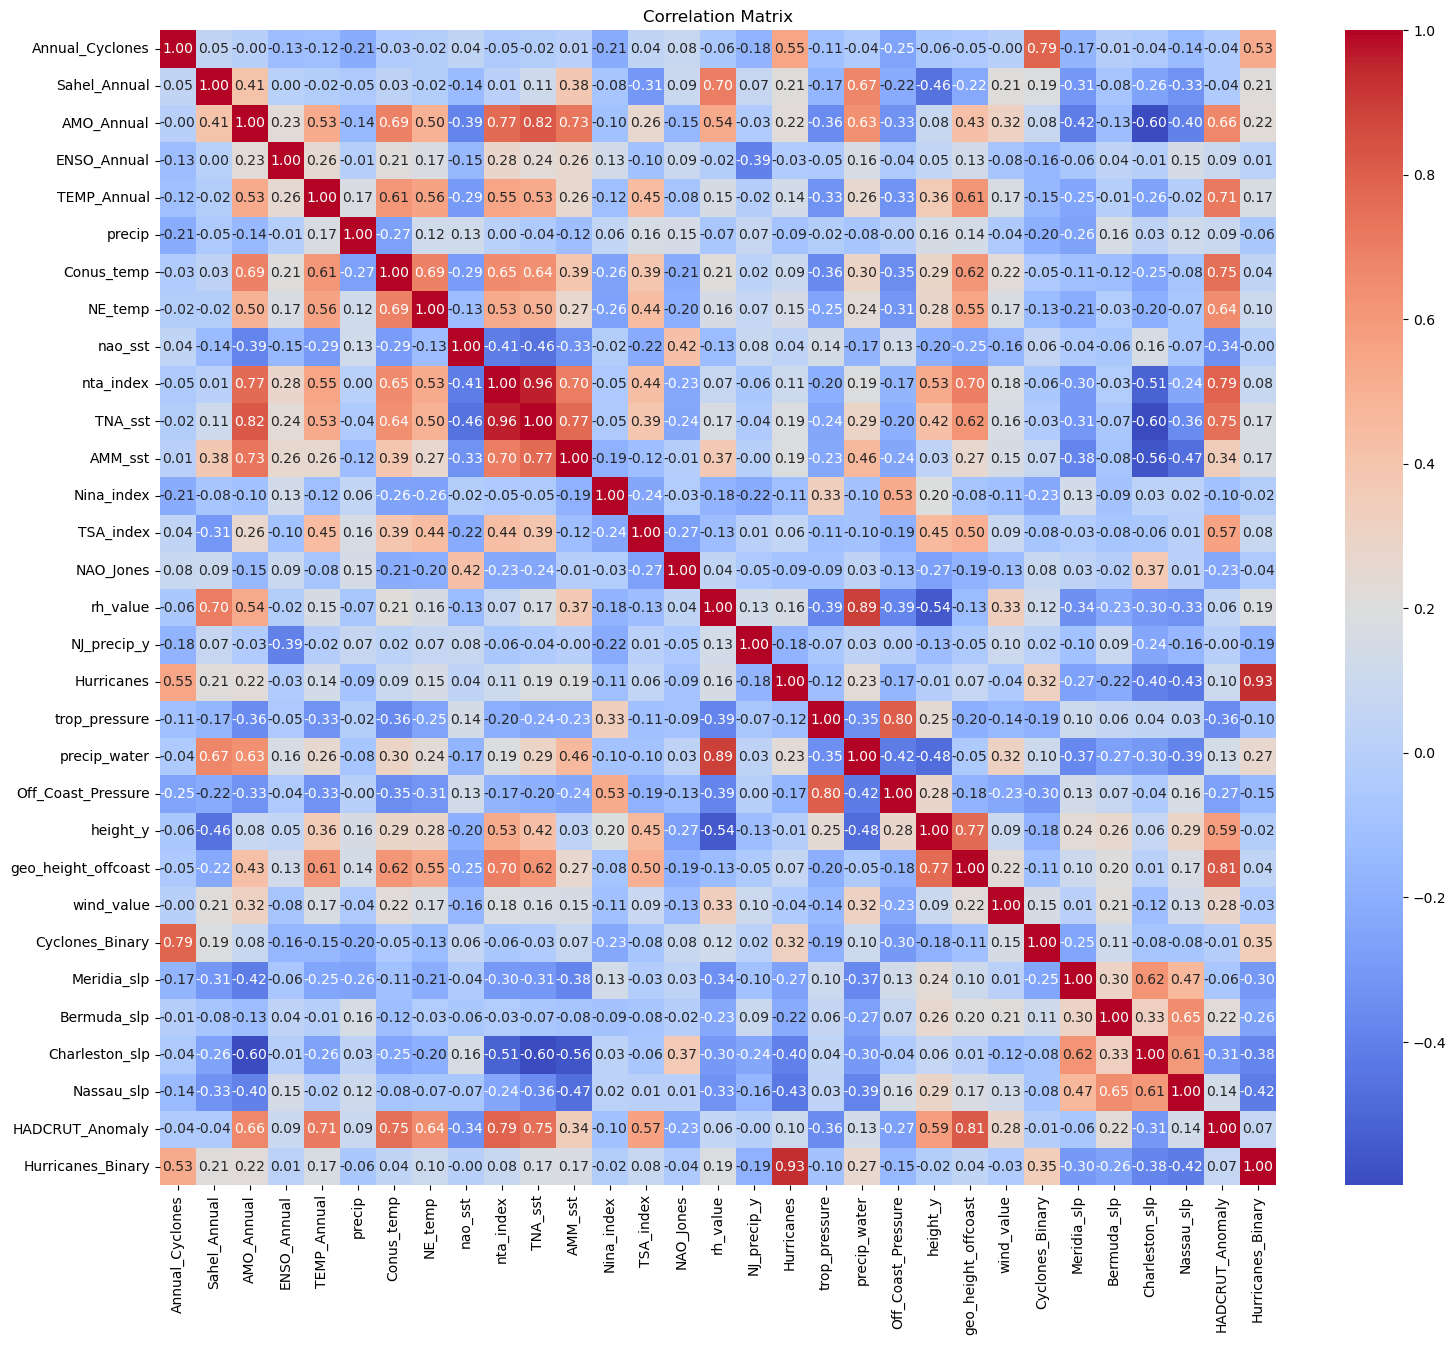

In [59]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:

# List of columns to scale
columns_to_scale = df.columns.drop(['Year', 'Annual_Cyclones', 'Hurricanes', 'Cyclones_Binary'])

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the scaled dataframe
df.head()


,Year,Annual_Cyclones,Sahel_Annual,AMO_Annual,ENSO_Annual,TEMP_Annual,precip,Conus_temp,NE_temp,nao_sst,...,NJ_precip_y,Hurricanes,height_x,trop_pressure,precip_water,Off_Coast_Pressure,height_y,geo_height_offcoast,wind_value,Cyclones_Binary
0,1950,1,2.122619,-0.093041,-1.656824,-0.176712,1.495703,-2.181785,-1.596831,0.140831,...,-0.078126,1,-1.060883,0.244085,1.656425,0.793543,-1.060883,-1.078952,0.315573,1
1,1951,2,0.573459,0.997485,-0.394250,0.921658,0.011110,-0.665189,-0.662145,0.258205,...,-1.064635,1,-0.086065,0.550971,1.268943,-0.339514,-0.086065,0.384326,0.333764,1
2,1952,1,1.851323,1.468913,0.512214,-0.013125,-2.023333,0.305802,0.673120,-0.535800,...,0.746464,1,-0.542208,-0.017198,1.942166,-0.337712,-0.542208,-0.209265,0.811912,1
3,1953,2,1.589276,1.307896,0.771204,-0.737583,-2.160795,0.185584,-0.194802,0.800200,...,-1.073630,0,-0.200081,0.737678,1.134732,0.352209,-0.200081,-0.367281,1.201706,1
4,1954,1,2.019341,0.162692,0.317972,0.220570,-2.105810,0.703446,-1.263015,-0.843045,...,1.025325,0,-2.192378,-0.583757,0.645509,-0.125602,-2.192378,-1.867306,0.055710,1


In [22]:
# Define the features and target
X = df.drop(columns=['Year', 'Annual_Cyclones', 'Hurricanes', 'Cyclones_Binary'])
y = df['Cyclones_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


(0.49339543942291425, 0.3865591661694732, -1.4159947885592072)

In [51]:
# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_classifier = rf_classifier.predict(X_test)
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf_classifier)
precision = precision_score(y_test, y_pred_rf_classifier)
recall = recall_score(y_test, y_pred_rf_classifier)
f1 = f1_score(y_test, y_pred_rf_classifier)
conf_matrix = confusion_matrix(y_test, y_pred_rf_classifier)

accuracy, precision, recall, f1, conf_matrix

(0.8666666666666667,
 0.8571428571428571,
 1.0,
 0.923076923076923,
 array([[ 1,  2],
        [ 0, 12]]))

- True Positives: 12 (correctly predicted cyclones)
- True Negatives: 1 (correctly predicted no cyclones)
- False Positives: 2 (incorrectly predicted cyclones)
- False Negatives: 0 (missed cyclones)

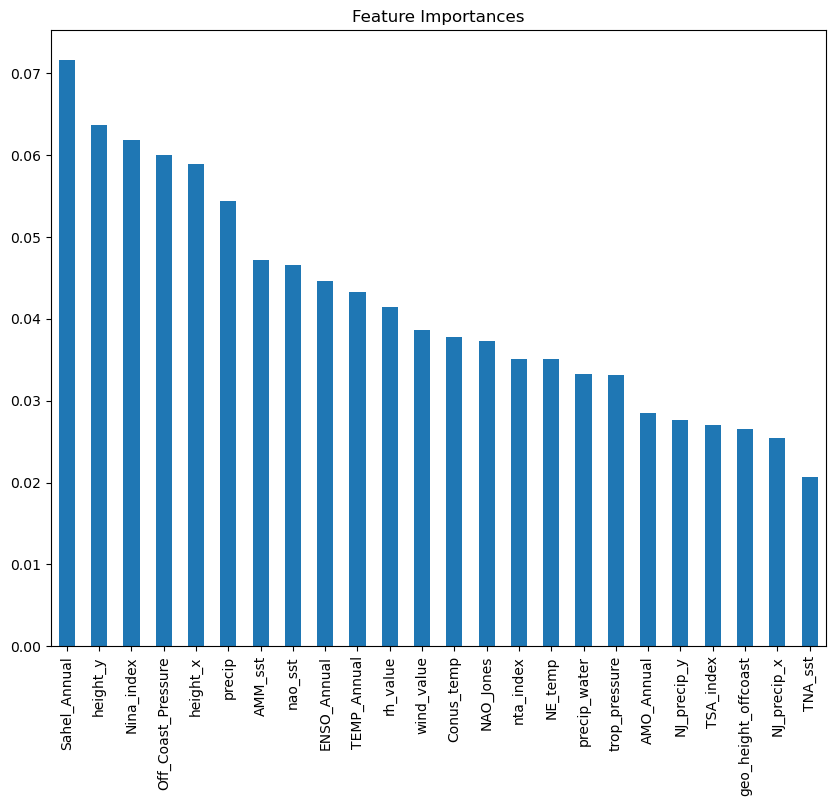

In [52]:
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [53]:
# List the bottom 5 features based on feature importance
low_importance_features = feature_importances.tail(5).index.tolist()
low_importance_features

['NJ_precip_y', 'TSA_index', 'geo_height_offcoast', 'NJ_precip_x', 'TNA_sst']

In [54]:
# Identify pairs of features with high correlation
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Remove self-correlations
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.9]  # Filter for high correlations

# Display the pairs
high_corr_pairs.head(10)

NJ_precip_y  NJ_precip_x    1.000000
NJ_precip_x  NJ_precip_y    1.000000
nta_index    TNA_sst        0.958446
TNA_sst      nta_index      0.958446
dtype: float64

In [55]:
# List of features to drop
features_to_drop = ['Conus_temp', 'NJ_precip_x', 'AMO_Annual', 'wind_value', 'NE_temp', 'nta_index']

# Drop the identified features from the dataset
X_reduced = X.drop(columns=features_to_drop)

In [56]:
X_scaled_reduced = scaler.fit_transform(X_reduced)

In [57]:
# Split the data into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_scaled_reduced, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_classifier_reduced = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)
rf_classifier_reduced.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred_reduced = rf_classifier_reduced.predict(X_test_reduced)

# Evaluate the model
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)
precision_reduced = precision_score(y_test_reduced, y_pred_reduced)
recall_reduced = recall_score(y_test_reduced, y_pred_reduced)
f1_reduced = f1_score(y_test_reduced, y_pred_reduced)

accuracy_reduced, precision_reduced, recall_reduced, f1_reduced

(0.8, 0.8461538461538461, 0.9166666666666666, 0.8799999999999999)

In [40]:
# Prepare the data
X_cv = df.drop(columns=['Year', 'Annual_Cyclones', 'Hurricanes', 'Cyclones_Binary'])
y_cv = df['Cyclones_Binary']

# Scale the features
scaler = StandardScaler()
X_scaled_cv = scaler.fit_transform(X_cv)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up k-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and compute metrics
accuracy_scores = cross_val_score(rf_classifier, X_scaled_cv, y_cv, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(rf_classifier, X_scaled_cv, y_cv, cv=kf, scoring='precision')
recall_scores = cross_val_score(rf_classifier, X_scaled_cv, y_cv, cv=kf, scoring='recall')
f1_scores = cross_val_score(rf_classifier, X_scaled_cv, y_cv, cv=kf, scoring='f1')

# Display the metrics
accuracy_mean = accuracy_scores.mean()
precision_mean = precision_scores.mean()
recall_mean = recall_scores.mean()
f1_mean = f1_scores.mean()

accuracy_mean, precision_mean, recall_mean, f1_mean


(0.6446428571428571,
 0.6783333333333335,
 0.8550000000000001,
 0.7507575757575757)

In [50]:
# Manually defined smaller grid
param_grid = {
    'n_estimators': [200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Function to train and evaluate the model with given hyperparameters
def evaluate_rf(params):
    rf_classifier = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        random_state=42
    )
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Prepare the data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_cv, y_cv, test_size=0.2, random_state=42)

# Iterate over the manually defined grid
results = []
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                for max_features in param_grid['max_features']:
                    params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features
                    }
                    metrics = evaluate_rf(params)
                    results.append((params, metrics))

# Find the best hyperparameters based on F1 score
best_params, best_metrics = max(results, key=lambda item: item[1][3])
best_params, best_metrics



({'n_estimators': 200,
  'max_depth': 50,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': 'sqrt'},
 (0.8666666666666667, 0.8571428571428571, 1.0, 0.923076923076923))

- n_estimators 500 = .8, .85, .92, .88
- n_estimators 200 = .87, .86, 1, .92


In [33]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

rf_mae, rf_mse, rf_r2

(0.42933333333333334, 0.21046666666666666, -0.31541666666666646)

In [26]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
feature_importances


,Feature,Importance
0,Sahel_Annual,0.116877
20,Off_Coast_Pressure,0.078237
12,TSA_index,0.061612
22,geo_height_offcoast,0.060618
23,wind_value,0.058253
11,Nina_index,0.056334
2,ENSO_Annual,0.053167
7,nao_sst,0.052214
17,height_x,0.045859
6,NE_temp,0.044173
